# 파일 경로 확인

In [4]:
%ls

LightGBM/
application_test.csv.zip
application_train.csv.zip
loan_data/
santander-product-recommendation/
santander-product-recommendation.ipynb
test_ver2.csv
train_ver2.csv*
대출예측모델(오세광).ipynb
대출예측모델 나이_소득별.ipynb
대출예측모델 김지연 0401.ipynb
대출예측모델 김지연 0402 ver1.ipynb
대출예측모델(김지연 3_29)1시반.ipynb
대출예측모델(김지연).ipynb
대출예측모델(김지연0330ver1).ipynb
대출상환예측(0406 김지연 ver b).ipynb
대출상환예측0407김지연.ipynb


In [5]:
%cd loan_data

/Users/ohsekwang/codestates/section_project/fin-tech_project/loan_data


# 라이브러리 import

In [92]:
# 데이터 프레임 
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분류, 데이터 학습 라이브러리
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix ## precision, recall 확인
from imblearn.over_sampling import SMOTE
import lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn import metrics
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
import shap
from shap import TreeExplainer, summary_plot
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

## 라이브러리 체크? 

# 데이터 불러오기

## 데이터 설명

### 이 데이터는 (https://www.kaggle.com/c/home-credit-default-risk)에서 가져왔고, 이 데이터는 고객의 상환가능 여부를 나타내주는 데이터이다. 

## 이 데이터에 대한 취지

### 금융거래가 없어 금융서비스를 제대로 이용하지 못하는 사람들
### 금융 데이터 이외에 데이터로 상환여부를 예측할 수 있도록 데이터 제공
### 더 많은 사람들이 금융 서비스를 이용할 수 있도록 하기 위한 취지 

### 금융 거래 데이터가 없는 사람에게 금융서비스 제공

## 데이터 가져오기

In [7]:
## train 데이터 불러오기
df_train = pd.read_csv('application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## test 데이터 불러오기

df_test = pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
## previous data 가져오기
prev_df = pd.read_csv('previous_application.csv')
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [10]:
## credit_balance
credit_balance_df = pd.read_csv('credit_card_balance.csv')
credit_balance_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


# 풀고자하는 문제
 

## 기본대출(금융) 정책에 대해서 검토하고하는 담당자에게 정책을 시행하기전 고려할 사항을 검토

### 금융 데이터를 통해서 정책을 시행하고자하는 대출액, 연령, 소득에 따른 상환율을 데이터 분석

### 상환여부 예측과 상환가능 금액 예측

# 성능평가지표 => 추가적인 보완 필요


## 1. Accuracy 
### 모델이 맞출 수 있는 전체정확도

## 2. precision
### 예측한 값에 대한 실제 예측을 맞춘 값

## 3. recall


## 4. F1 score


## 5. AUC, ROC 커브

# 데이터 살펴보기

In [11]:
## 데이터 정보확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
## 칼럼명 확인
df_columns_list = df_train.columns.values.tolist()

In [13]:
## 타켓의 분포확인
df_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## 데이터 타켓(상환여부) 분포확인
### 상환이 가능한 사람들이 0, 상환이 어려운 사람들이 1이다 
### 기본적인 베이스라인 모델의 성능은 92%이상이 되어야 한다. 
### 불균형한 클래스를 지니고 있기 때문에, 목적에 따라 정밀도(precision), 재현율(recall), f1-score, ROC 커브를 참조 모델의 성능을 개선해야 한다. 


## 데이터 셋 살펴보기 

In [14]:
df_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터 비율확인하기

In [34]:
## 성별 비율
df_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
##  차 소유 비율
df_train['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [36]:
## 집/ 아파트 유무
df_train['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

### 경제적인 것과 직접적인 관련있는 데이터 확인해보기

In [15]:
## 고객의 평균 수입 확인
df_train['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f')) ## scientific notation 없애기

##  평균 수입 : 168,797

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [16]:
## 대출액 기본 정보 확인
df_train['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

## 평균 대출액 : 599,025

count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

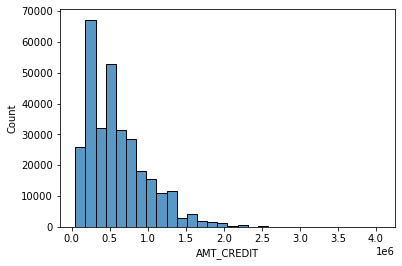

In [17]:
## 대출액 빈도 확인해보기
sns.histplot(data=df_train, x='AMT_CREDIT', bins=30)

<AxesSubplot:>

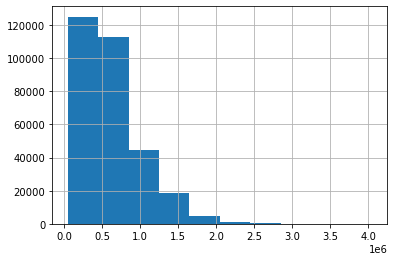

In [18]:
## 대출금액 구간을 나눠서 보자

df_train['AMT_CREDIT'].value_counts()
df_train['AMT_CREDIT'].hist()

In [19]:
## 대출금이 100,000 이하의 대출 정보만 확인
credit_amt_10 = df_train[df_train['AMT_CREDIT'] <= 100000]
credit_amt_10

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
63,100075,0,Cash loans,F,N,N,0,112500.0,95940.0,10462.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
108,100127,0,Cash loans,M,N,Y,0,112500.0,52128.0,5341.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
186,100216,0,Cash loans,F,N,N,0,90000.0,67500.0,6705.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
214,100249,0,Cash loans,F,N,Y,2,67500.0,76410.0,4513.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307282,455999,0,Cash loans,M,Y,Y,0,112500.0,71955.0,8136.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307291,456014,0,Cash loans,F,N,Y,1,112500.0,50940.0,5877.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307294,456017,0,Cash loans,F,N,N,2,54000.0,81504.0,8775.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0
307400,456133,0,Cash loans,M,N,Y,0,67500.0,47970.0,5296.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

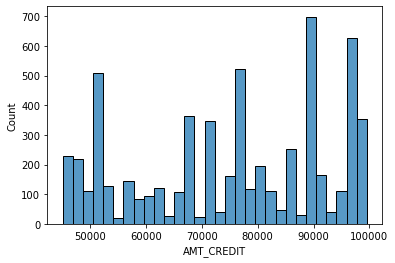

In [20]:
## $100,000 이하 대출액 분포확인
sns.histplot(data=credit_amt_10, x='AMT_CREDIT', bins=30)

In [21]:
## 대출종류 확인/ 현금 대출, 리볼빙 대출
credit_amt_10['NAME_CONTRACT_TYPE'].value_counts(normalize=True)


Cash loans    1.0
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

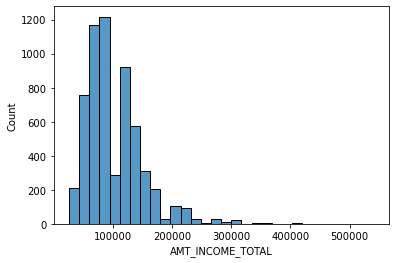

In [22]:
## 100,000 이하 대출자에 대한 수입에 대한 분류
sns.histplot(data=credit_amt_10, x='AMT_INCOME_TOTAL', bins = 30)

In [25]:
df_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## 각 조건별로 데이터 확인해보기

### 소득분위별 데이터 확인

/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

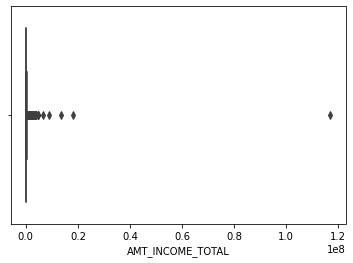

In [38]:
## 소득별 정리

sns.boxplot(df_train['AMT_INCOME_TOTAL'])

In [40]:
## 소득분위를 보기 위한 데이터 셋 
# train data
df_age = df_train

In [42]:
## 소득별로 5분위로 나누기
df_age['income_rank'] = pd.qcut(df_age['AMT_INCOME_TOTAL'], q=[0,.2,.4,.6,.8,1.], labels=range(1,6))

In [43]:
df_age.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,4
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2


<AxesSubplot:xlabel='income_rank', ylabel='Count'>

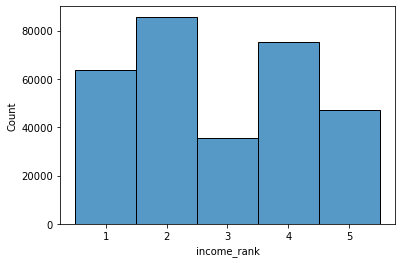

In [45]:
## 소득분위별 분포 확인
sns.histplot(data=df_age, x='income_rank', bins=40)

In [52]:
## 소득분위별 상환율 확인
print(df_age.groupby(['income_rank'])['TARGET'].value_counts(normalize=True))

income_rank  TARGET
1            0         0.917938
             1         0.082062
2            0         0.914117
             1         0.085883
3            0         0.913153
             1         0.086847
4            0         0.919431
             1         0.080569
5            0         0.934802
             1         0.065198
Name: TARGET, dtype: float64



#### 해석 적절성
* 소득분위별 상환여부는 5분위 빼고는 크게 차이가 없었다. 
* 소득에 따른 상환여부를 판단하는 건 크게 의미가 없었다. 

### 연령별로 확인 


In [53]:
df_age['age'] = df_age['DAYS_BIRTH']/365*-1
df_age

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3,25.553425
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,56.917808
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,3,41.002740
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,32.769863


In [57]:
## 연령별 소득확인해보기
print(df_age.groupby(['age'])['AMT_INCOME_TOTAL'].value_counts(normalize=True))

age        AMT_INCOME_TOTAL
20.517808  112500.0            1.000000
21.021918  90000.0             1.000000
21.030137  112500.0            0.500000
           178447.5            0.500000
21.035616  72000.0             0.333333
                                 ...   
69.032877  112500.0            0.500000
69.041096  202500.0            1.000000
69.043836  61830.0             0.500000
           180000.0            0.500000
69.120548  450000.0            1.000000
Name: AMT_INCOME_TOTAL, Length: 202219, dtype: float64


In [58]:
## 나이대 별로 정리
age = df_age['age']
age_group = np.trunc(age)
df_age['age_group'] = age_group
df_age


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548,25.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,5,45.931507,45.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.180822,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,52.068493,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2,54.608219,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,25.553425,25.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,56.917808,56.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,3,41.002740,41.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4,32.769863,32.0


In [59]:
## age 확인
df_age['age'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: age, dtype: float64

In [60]:
## 20~60대까지로 변환 
bins =[20,30,40,50,60,70]
labels = [20,30,40,50,60]

df_age['age_group'] = pd.cut(df_age["age"], bins = bins, labels = labels)


# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([21,22,23,24,25,26,27,28,29], 20)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([31,32,33,34,35,36,37,38,39], 30)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([41,42,43,44,45,46,47,48,49], 40)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([51,52,53,54,55,56,57,58,59], 50)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([61,62,63,64,65,66,67,68,69], 60)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([71,72,73,74,75,76,77,78,79], 70)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([81,82,83,84,85,86,87,88,89], 80)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([91,92,93,94,95,96,97,98,99], 90)
# df_fin['AGE_EDIT'].astype(int)


In [61]:
## 연령대별 소득확인해보기
print(df_age.groupby(['age_group'])['AMT_INCOME_TOTAL'].value_counts(normalize=True))

age_group  AMT_INCOME_TOTAL
20         135000.0            0.129851
           112500.0            0.122121
           157500.0            0.096821
           180000.0            0.083517
           90000.0             0.082317
                                 ...   
60         886500.0            0.000028
           990000.0            0.000028
           1260000.0           0.000028
           1291500.0           0.000028
           2250000.0           0.000028
Name: AMT_INCOME_TOTAL, Length: 4189, dtype: float64


In [64]:
## 연령대별 평균 수입
print(df_age.groupby(['age_group'])['AMT_INCOME_TOTAL'].mean())

age_group
20    159520.624754
30    178888.784549
40    180565.509225
50    165128.297171
60    138897.496600
Name: AMT_INCOME_TOTAL, dtype: float64


#### 연령대별로도 해석하기

In [93]:
### 연령별 상환율 차이

age_target_rate = df_age.groupby(['age_group'])['TARGET'].value_counts(normalize=True)
age_target_rate

age_group  TARGET
20         0         0.885431
           1         0.114569
30         0         0.904165
           1         0.095835
40         0         0.923492
           1         0.076508
50         0         0.938703
           1         0.061297
60         0         0.950786
           1         0.049214
Name: TARGET, dtype: float64

####  우려점 : 연령별 상환율을 봤을 때, 20~30대의 상환율이 떨어진다.

### 소득별, 연령별 타켓분포 확인

In [65]:
## 소득분위별 연령별 target 분포 확인
predict_income_age_target = df_age.groupby(['income_rank','age_group'])['TARGET'].value_counts(normalize=True)
predict_income_age_target

income_rank  age_group  TARGET
1            20         0         0.872648
                        1         0.127352
             30         0         0.891724
                        1         0.108276
             40         0         0.917444
                        1         0.082556
             50         0         0.942062
                        1         0.057938
             60         0         0.950395
                        1         0.049605
2            20         0         0.876351
                        1         0.123649
             30         0         0.898935
                        1         0.101065
             40         0         0.919001
                        1         0.080999
             50         0         0.936548
                        1         0.063452
             60         0         0.950638
                        1         0.049362
3            20         0         0.880092
                        1         0.119908
             30        

#### 우려점
* 각 분위별로 소득이 적을수록 더 떨어지는 문제점 20~30대의 상환율이 떨어지기 때문에, 정책을 시행할 때 상환율이 떨어질 수 있으므로 주의해야한다. 

In [66]:
## 소득분위 연령별 평균 수입

income_mean = df_age.groupby(['income_rank','age_group'])['AMT_INCOME_TOTAL'].mean()
income_mean

income_rank  age_group
1            20            80813.319712
             30            79972.815711
             40            79508.080392
             50            76715.372636
             60            74119.951394
2            20           122703.380549
             30           123583.547887
             40           123515.130438
             50           122732.099155
             60           121779.895192
3            20           155445.727385
             30           155635.981793
             40           155699.790554
             50           154990.720999
             60           154936.774609
4            20           197569.325026
             30           199030.463922
             40           199380.155476
             50           198539.228201
             60           196888.273667
5            20           323816.697423
             30           344614.140255
             40           340844.334269
             50           333703.389756
             60  

In [67]:
## 분위별 연령별 평균 대출액
credit_mean = df_age.groupby(['income_rank','age_group'])['AMT_CREDIT'].mean()
credit_mean

income_rank  age_group
1            20           317216.086942
             30           387008.043079
             40           424254.021969
             50           421728.701460
             60           355995.798153
2            20           410438.360973
             30           505007.423833
             40           559065.652339
             50           569136.446444
             60           492834.848303
3            20           498080.782843
             30           586660.364140
             40           645261.738510
             50           654297.527447
             60           591317.907667
4            20           579677.405531
             30           674817.764622
             40           728883.099445
             50           759237.002231
             60           687561.782797
5            20           745519.870955
             30           850826.637298
             40           914645.590212
             50           951043.429876
             60  

In [68]:
## 대출 금액/소득금액  
income_credit_ratio = credit_mean/income_mean
income_credit_ratio

income_rank  age_group
1            20           3.925295
             30           4.839245
             40           5.335986
             50           5.497317
             60           4.802969
2            20           3.344964
             30           4.086365
             40           4.526293
             50           4.637226
             60           4.046931
3            20           3.204210
             30           3.769439
             40           4.144269
             50           4.221527
             60           3.816511
4            20           2.934046
             30           3.390525
             40           3.655745
             50           3.824116
             60           3.492142
5            20           2.302290
             30           2.468925
             40           2.683470
             50           2.849966
             60           2.851680
dtype: float64

#### 소득별 연령별로도 해석하기


In [69]:
### 소득분위 낮은 사람들 중 연령분포 확인
incomerank_age_rate = df_age.groupby(['income_rank'])['age_group'].value_counts(normalize=True)
incomerank_age_rate

income_rank  age_group
1            50           0.243156
             30           0.217289
             40           0.203751
             60           0.194720
             20           0.141085
2            30           0.261568
             40           0.234806
             50           0.217408
             20           0.168338
             60           0.117881
3            30           0.274674
             40           0.243026
             50           0.217866
             20           0.159958
             60           0.104476
4            30           0.289354
             40           0.272059
             50           0.213698
             20           0.142214
             60           0.082675
5            30           0.306762
             40           0.302899
             50           0.213825
             20           0.110191
             60           0.066323
Name: age_group, dtype: float64

In [74]:
### 소득분위별 수입유형분포
incomerank_age_rate = df_age.groupby(['income_rank'])['NAME_INCOME_TYPE'].value_counts(normalize=True)
incomerank_age_rate

income_rank  NAME_INCOME_TYPE    
1            Working                 0.509243
             Pensioner               0.314240
             Commercial associate    0.117290
             State servant           0.058912
             Unemployed              0.000220
             Maternity leave         0.000047
             Student                 0.000047
2            Working                 0.555844
             Commercial associate    0.197992
             Pensioner               0.183556
             State servant           0.062503
             Student                 0.000047
             Unemployed              0.000047
             Maternity leave         0.000012
3            Working                 0.539588
             Commercial associate    0.228105
             Pensioner               0.160297
             State servant           0.071898
             Student                 0.000113
4            Working                 0.516348
             Commercial associate    0.282044


In [75]:
#### 연령별, 노동유형별, 직장유형 확인
incomerank_age_rate = df_age.groupby(['age_group'])['NAME_INCOME_TYPE'].value_counts(normalize=True)
incomerank_age_rate

age_group  NAME_INCOME_TYPE    
20         Working                 0.626086
           Commercial associate    0.298483
           State servant           0.072277
           Pensioner               0.002932
           Unemployed              0.000089
           Student                 0.000067
           Businessman             0.000044
           Maternity leave         0.000022
30         Working                 0.630048
           Commercial associate    0.278187
           State servant           0.085545
           Pensioner               0.006050
           Student                 0.000085
           Unemployed              0.000049
           Maternity leave         0.000024
           Businessman             0.000012
40         Working                 0.614755
           Commercial associate    0.275643
           State servant           0.085693
           Pensioner               0.023726
           Unemployed              0.000105
           Student                 0.000039


In [39]:
print(df_train['NAME_INCOME_TYPE'].value_counts(normalize=True))
print(credit_amt_10['NAME_INCOME_TYPE'].value_counts(normalize=True))
print(credit_amt_5['NAME_INCOME_TYPE'].value_counts(normalize=True))


Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64
Working                 0.523151
Pensioner               0.289141
Commercial associate    0.128248
State servant           0.059294
Student                 0.000167
Name: NAME_INCOME_TYPE, dtype: float64
Working                 0.502674
Pensioner               0.317291
Commercial associate    0.124777
State servant           0.055258
Name: NAME_INCOME_TYPE, dtype: float64


In [76]:
## 20~30대 그룹화
age_group_2030 = df_age[df_age['age_group'] == 20 | 30]



In [77]:
## 소득 1,2분위 그룹
income_rank_12 = df_age[df_age['income_rank']==1 | 2]


In [78]:
## 20대, 1분위 그룹
age_20_income_rank_1 = df_age[(df_age['age_group'] == 20) & (df_age['income_rank'] == 1)]

In [79]:
age_20_income_rank_1['TARGET'].value_counts(normalize=True)

0    0.872648
1    0.127352
Name: TARGET, dtype: float64

### 100,000이하 대출액 대출자

In [26]:
## 100,000이하 대출액 대출자
credit_amt_10 = df_train[df_train['AMT_CREDIT'] <= 100000]
credit_amt_10['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

count     6004.000000
mean     75231.710526
std      16966.541306
min      45000.000000
25%      61128.000000
50%      76410.000000
75%      90000.000000
max      99576.000000
Name: AMT_CREDIT, dtype: object

In [27]:
## 100,000이하 대출자 수입 평균
credit_amt_10['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count      6004.000000
mean     102340.480263
std       49785.020040
min       26100.000000
25%       67500.000000
50%       90000.000000
75%      126000.000000
max      540000.000000
Name: AMT_INCOME_TOTAL, dtype: object

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

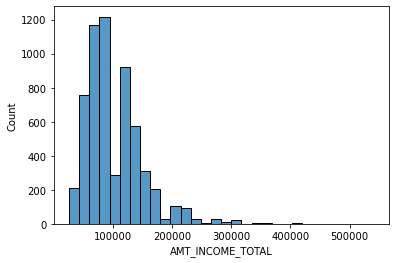

In [28]:
## 100,000 이하 대출자에 대한 수입에 대한 분류
sns.histplot(data=credit_amt_10, x='AMT_INCOME_TOTAL', bins = 30)

In [214]:
# $100,000이하 대출자의 수입 대비 대출액 비율
credit_amt_10['ratio'] = credit_amt_10['AMT_CREDIT'] / credit_amt_10['AMT_INCOME_TOTAL'] * 100
credit_amt_10['ratio'].describe()

<ipython-input-214-cfaf3029c8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_amt_10['ratio'] = credit_amt_10['AMT_CREDIT'] / credit_amt_10['AMT_INCOME_TOTAL'] * 100


count    6004.000000
mean       89.308316
std        45.303157
min         8.333333
25%        56.600000
50%        80.000000
75%       110.740417
max       355.333333
Name: ratio, dtype: float64

#### 아웃라이어를 제거하려고 하였으나, 수입 분포로 봤을 때 큰 차이가 있다고 보기 어려웠다.

In [131]:
## 전체평균 수입대비 대출액 395%수준
total_rate = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL'] * 100
total_rate.describe()

count    307511.000000
mean        395.757024
std         268.972819
min           0.480762
25%         201.866667
50%         326.506667
75%         515.988000
max        8473.684211
dtype: float64

### 50,000 이하의 대출자



In [29]:
credit_amt_5 = df_train[df_train['AMT_CREDIT'] <= 50000]

In [30]:
## 수입확인
credit_amt_5['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       561.000000
mean      95068.315508
std       51411.618943
min       27000.000000
25%       67500.000000
50%       85500.000000
75%      112500.000000
max      540000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [31]:
## 소득대비대출비율

credit_amt_5['ratio'] = credit_amt_5['AMT_CREDIT'] / credit_amt_5['AMT_INCOME_TOTAL'] * 100
credit_amt_5['ratio'].describe()

<ipython-input-31-dddb165c20a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_amt_5['ratio'] = credit_amt_5['AMT_CREDIT'] / credit_amt_5['AMT_INCOME_TOTAL'] * 100


count    561.000000
mean      61.782275
std       28.800633
min        8.333333
25%       40.000000
50%       55.555556
75%       73.706667
max      167.874016
Name: ratio, dtype: float64

In [32]:
## 데이터 샘플의 수
credit_amt_10.shape, credit_amt_5.shape, df_train.shape

((6004, 122), (561, 123), (307511, 122))

In [33]:
## 상환 여부 비교
print('수입 $50,000이하 대출자들 상환비율\n', 
      credit_amt_5['TARGET'].value_counts(normalize=True))

print('수입 $100,000이하 대출자들 상환비율\n', 
      credit_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $50,000이하 대출자들 상환비율
 0    0.959002
1    0.040998
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.94487
1    0.05513
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


### 소득 대출 상환 비율
#### 전체 대출액 395%, 100,000이하 대출자 89%,  50,000 이하 61%로 나타났다.
#### 대출액이 낮을수록 소득대비대출비율이 낮다.
#### 전체데이터 대비 '대출액 100,000이하 대출자들 상환비율이 약 2.5%, 50,000이하 대출자들 상환비율이 약 4% 높았다'


In [139]:
## 낮은 대출액을 가진 사람 중에, 연금 생활자의 비율이 높다. 

### 100,000이하 수입있는 대출자

In [140]:
## $100,000 수입있는 대출자 확인
income_amt_10 = df_train[df_train['AMT_INCOME_TOTAL'] <= 100000]
income_amt_10['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count    63698.000000
mean     78074.093642
std      15363.678118
min      25650.000000
25%      67500.000000
50%      81000.000000
75%      90000.000000
max      99900.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [141]:
## $100,000이하 수입있는 대출자 대출금 확인
income_amt_10['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

count      63698.000000
mean      387216.145248
std       270024.339152
min        45000.000000
25%       193500.000000
50%       284400.000000
75%       528633.000000
max      2517300.000000
Name: AMT_CREDIT, dtype: object

In [142]:
# $100,000이하 수입을 가진 대출자의 소득 대비 대출 비율
income_amt_10['ratio'] = income_amt_10['AMT_CREDIT'] / income_amt_10['AMT_INCOME_TOTAL'] * 100

<ipython-input-142-02606583f30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_amt_10['ratio'] = income_amt_10['AMT_CREDIT'] / income_amt_10['AMT_INCOME_TOTAL'] * 100


<AxesSubplot:xlabel='ratio', ylabel='Count'>

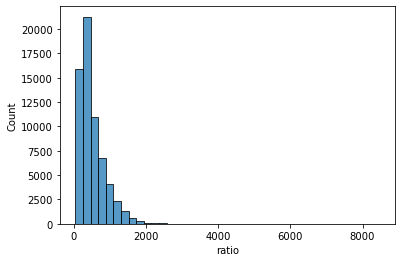

In [143]:
sns.histplot(data=income_amt_10, x = 'ratio' , bins=40)

In [144]:
## $100,000 이하의 대출자의 평균 수입 대비 대출액은 500% 수준이다.
income_amt_10['ratio'].describe()

count    63698.000000
mean       507.177112
std        362.726726
min         45.454545
25%        257.272727
50%        384.615385
75%        672.211111
max       8473.684211
Name: ratio, dtype: float64

In [145]:
## 전체평균 수입대비 대출액 395%수준
total_rate = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL'] * 100
total_rate.describe()

count    307511.000000
mean        395.757024
std         268.972819
min           0.480762
25%         201.866667
50%         326.506667
75%         515.988000
max        8473.684211
dtype: float64

In [146]:
## $50,000 이하의 대출 정보만 본다. 696%수준
income_amt_5 = df_train[df_train['AMT_INCOME_TOTAL'] <= 50000]
income_amt_5['ratio'] = income_amt_5['AMT_CREDIT'] / income_amt_5['AMT_INCOME_TOTAL'] * 100
income_amt_5['ratio'].describe()


<ipython-input-146-025e55e9d6f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_amt_5['ratio'] = income_amt_5['AMT_CREDIT'] / income_amt_5['AMT_INCOME_TOTAL'] * 100


count    4517.000000
mean      696.757535
std       543.298104
min        90.909091
25%       308.727273
50%       545.454545
75%       902.857143
max      8473.684211
Name: ratio, dtype: float64

In [147]:
## 데이터 샘플의 수
income_amt_10.shape, income_amt_5.shape, df_train.shape

((63698, 123), (4517, 123), (307511, 122))

In [148]:
income_amt_5.shape

(4517, 123)

In [149]:
## 상환 여부 비교
print('수입 $50,000이하 대출자들 상환비율\n', 
      income_amt_5['TARGET'].value_counts(normalize=True))

print('수입 $100,000이하 대출자들 상환비율\n', 
      income_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $50,000이하 대출자들 상환비율
 0    0.924065
1    0.075935
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.917972
1    0.082028
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [150]:
income_amt_3 = df_train[df_train['AMT_INCOME_TOTAL'] <= 30000]
income_amt_3['ratio'] = income_amt_3['AMT_CREDIT'] / income_amt_3['AMT_INCOME_TOTAL'] * 100
income_amt_3['ratio'].describe()

<ipython-input-150-a1f4764e5457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_amt_3['ratio'] = income_amt_3['AMT_CREDIT'] / income_amt_3['AMT_INCOME_TOTAL'] * 100


count     141.000000
mean     1022.726185
std       964.301441
min       153.846154
25%       484.533333
50%       769.230769
75%      1229.283990
max      8473.684211
Name: ratio, dtype: float64

In [155]:
income_amt_3.shape

(141, 123)

In [156]:
## $40,000 이하의 대출 정보만 본다. 696%수준
income_amt_4 = df_train[df_train['AMT_INCOME_TOTAL'] <= 40000]
income_amt_4['ratio'] = income_amt_4['AMT_CREDIT'] / income_amt_4['AMT_INCOME_TOTAL'] * 100
income_amt_4['ratio'].describe()

<ipython-input-156-b77b6e204399>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_amt_4['ratio'] = income_amt_4['AMT_CREDIT'] / income_amt_4['AMT_INCOME_TOTAL'] * 100


count     963.000000
mean      848.407118
std       668.460806
min       121.951220
25%       375.000000
50%       690.800000
75%      1061.150000
max      8473.684211
Name: ratio, dtype: float64

In [157]:
income_amt_4.shape

(963, 123)

In [158]:
## 상환 여부 비교

print('수입 $30,000이하 대출자들 상환비율\n', 
      income_amt_3['TARGET'].value_counts(normalize=True))
print('수입 $40,000이하 대출자들 상환비율\n', 
      income_amt_4['TARGET'].value_counts(normalize=True))

print('수입 $50,000이하 대출자들 상환비율\n', 
      income_amt_5['TARGET'].value_counts(normalize=True))

print('수입 $100,000이하 대출자들 상환비율\n', 
      income_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $30,000이하 대출자들 상환비율
 0    0.943262
1    0.056738
Name: TARGET, dtype: float64
수입 $40,000이하 대출자들 상환비율
 0    0.916926
1    0.083074
Name: TARGET, dtype: float64
수입 $50,000이하 대출자들 상환비율
 0    0.924065
1    0.075935
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.917972
1    0.082028
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


### 기본 금융 정책을 시행할 때, 대출액은 낮은 사람들이 상환율이 높다는 것을 강조, 리스크가 덜한 걸 어필할 수 있다. 
### 수입액, 대출액을 조건으로, 상환율이 어떻게 변화하는지 확인

## 적절성 해석 : 소득액 보다, 대출액이 낮을 수록 상환율이 높았다. 
## 추가작업 대출분위별로 짤라서 상환율을 확인해본다. 

In [159]:
## 수입이 적은 사람들의 평균 
## $30,000이하 수입 대출자! 상환비율이 가장 높다. 


# 정책실험 당사자 연령별 확인



##  기본금융을 아이디어로 구체화 해보기
* 조건
* 1000만원 이하 한도 내 대출을 3%이하 이자로 빌리는 것 가능!
* 만25,26세 or 결혼 적령기 (남성 만 33,34세, 여성 만 29~30세) 시범 운용!

#### 기본적인 값들 구해보기! 
* 소득분위 낮은 1분위/20~30대 => 5개 단계, 10단계, 20단계 나눠보면 어떨까? 
* 평균 소득, 
* 평균 대출액, 
* 평균 월 납입액, 
* 상환 여부


In [80]:
## 만 25~26세만 뽑아보기
age_2526 = df_age[(df_age['age']>=25) & (df_age['age']<27)]
age_2526

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548,20
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,26.783562,20
44,100051,0,Cash loans,M,N,Y,0,202500.0,661702.5,48280.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,4,26.923288,20
77,100089,0,Cash loans,M,N,Y,0,135000.0,337761.0,15781.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,2,26.482192,20
101,100120,0,Cash loans,F,N,N,0,135000.0,781920.0,28215.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2,26.438356,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307244,455953,0,Cash loans,F,Y,N,0,117000.0,135000.0,9823.5,...,0,1.0,1.0,0.0,0.0,0.0,4.0,2,26.295890,20
307268,455985,1,Cash loans,M,N,N,0,135000.0,355536.0,19417.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,25.123288,20
307396,456129,0,Cash loans,M,N,Y,0,135000.0,298512.0,29655.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,2,25.997260,20
307468,456208,0,Cash loans,F,N,Y,1,135000.0,305955.0,21888.0,...,0,0.0,0.0,0.0,0.0,1.0,2.0,2,26.969863,20


In [81]:
## 평균 대출액
age_2526['AMT_CREDIT'].describe().apply(lambda x: format(x,'f'))

count       8729.000000
mean      481022.618513
std       351674.015093
min        45000.000000
25%       226422.000000
50%       381528.000000
75%       618840.000000
max      2925000.000000
Name: AMT_CREDIT, dtype: object

In [82]:
age_2526['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x,'f'))

count       8729.000000
mean      160250.510270
std        79144.711033
min        27000.000000
25%       112500.000000
50%       135000.000000
75%       189000.000000
max      1800000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [83]:
## 수입 대비 대출액 비율 # 319% 수준
age_2526['ratio'] = age_2526['AMT_CREDIT'] / age_2526['AMT_INCOME_TOTAL'] * 100
age_2526['ratio'].describe()


<ipython-input-83-eac69310af19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_2526['ratio'] = age_2526['AMT_CREDIT'] / age_2526['AMT_INCOME_TOTAL'] * 100


count    8729.000000
mean      319.758171
std       215.786384
min        14.285714
25%       170.484615
50%       266.666667
75%       403.733333
max      3669.230769
Name: ratio, dtype: float64

In [84]:
## age_2526의 타켓 분포 # 전체 상환보다 1% 정도 떨어지는 수준
age_2526['TARGET'].value_counts(normalize=True)

0    0.897354
1    0.102646
Name: TARGET, dtype: float64

In [85]:
## 수입이 50,000 이하 
income_2526_5 = age_2526[age_2526['AMT_INCOME_TOTAL'] <= 50000]
income_2526_5['ratio'] = income_2526_5['AMT_CREDIT'] / income_2526_5['AMT_INCOME_TOTAL'] * 100
income_2526_5['ratio'].describe()


<ipython-input-85-71ae86e34715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2526_5['ratio'] = income_2526_5['AMT_CREDIT'] / income_2526_5['AMT_INCOME_TOTAL'] * 100


count      57.000000
mean      500.962635
std       279.284151
min       106.600000
25%       318.181818
50%       450.000000
75%       632.000000
max      1901.960000
Name: ratio, dtype: float64

In [86]:
## age_2526의 타켓 분포 # 비슷한 형태
income_2526_5['TARGET'].value_counts(normalize=True)

0    0.894737
1    0.105263
Name: TARGET, dtype: float64

In [87]:
## 대출액이 50,000 이하 
credit_2526_5 = age_2526[age_2526['AMT_CREDIT'] <= 50000]
credit_2526_5['ratio'] = credit_2526_5['AMT_CREDIT'] / credit_2526_5['AMT_INCOME_TOTAL'] * 100
credit_2526_5['ratio'].describe()

<ipython-input-87-04810d8fe9d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_2526_5['ratio'] = credit_2526_5['AMT_CREDIT'] / credit_2526_5['AMT_INCOME_TOTAL'] * 100


count     29.000000
mean      43.948251
std       19.597197
min       14.285714
25%       30.457143
50%       40.000000
75%       53.300000
max      106.600000
Name: ratio, dtype: float64

In [88]:
## 대출액 50,000 이하 분포
credit_2526_5['TARGET'].value_counts(normalize=True)

0    0.896552
1    0.103448
Name: TARGET, dtype: float64

In [89]:
## 남성 만33~34세
age_male = df_age[(df_age['age']>=33) & (df_age['age']<35) & (df_age['CODE_GENDER']=='M')]
age_male

## 여성 만29~30세
age_female = df_age[(df_age['age']>=29) & (df_age['age']<31) & (df_age['CODE_GENDER']=='F')]
age_female


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,0,0.0,0.0,0.0,0.0,0.0,5.0,5,30.536986,30
31,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0,0.0,0.0,0.0,0.0,2.0,5.0,2,30.531507,30
96,100114,0,Cash loans,F,N,Y,0,135000.0,284400.0,22599.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,2,29.408219,20
100,100119,0,Revolving loans,F,N,Y,0,54000.0,180000.0,9000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.526027,30
103,100122,0,Cash loans,F,N,N,1,76500.0,808650.0,26217.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.010959,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307412,456145,0,Cash loans,F,N,N,0,162000.0,900000.0,29034.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,3,29.019178,20
307436,456174,0,Cash loans,F,N,N,2,135000.0,215640.0,17064.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2,30.887671,30
307447,456185,0,Cash loans,F,N,Y,0,135000.0,528633.0,22527.0,...,0,0.0,0.0,0.0,0.0,1.0,3.0,2,30.665753,30
307453,456192,0,Cash loans,F,N,N,1,135000.0,450000.0,24412.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2,30.904110,30


In [90]:
## 남성이 상환이 조금 떨어지는 형태
age_male['TARGET'].value_counts(normalize=True)

0    0.881746
1    0.118254
Name: TARGET, dtype: float64

In [91]:
## 여성은 비슷한 수준 
age_female['TARGET'].value_counts(normalize=True)

0    0.897167
1    0.102833
Name: TARGET, dtype: float64

In [ ]:
## shap 활용
row = age_group_2030_X_val.iloc[[3000]]
row

In [ ]:
## shap을 활용한 모델 해석

import shap
from shap import TreeExplainer, summary_plot

# explainer = shap.TreeExplainer(model)
# row_processed = processor.transform(row)
# shap_values = explainer.shap_values(row_processed)

# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values, 
#     features=row, 
#     link='logit' # SHAP value를 확률로 변환해 표시합니다.
# )

#%time shap_values = shap.TreeExplainer(clf_3).shap_values(row)

explainer =shap.TreeExplainer(clf_3)
shape_value = explainer.shap_values(age_group_2030_X_val)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values[1,:], 
    features=row[1,:], 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.

)


## 해석: 가정한 연령대의 기본대출을 시행하였을 경우, 상환비율이 떨어질 우려가 있으
#### 구체적인 해석 필요. 

# object feature들을 인코딩

In [96]:
# ## object feature들을 label encoding
# object_columns = df_fin.dtypes[df_fin.dtypes == 'object'].index.tolist()
# object_columns

# ## 카테고리 칼럼 인코딩
# df_fin['CODE_GENDER'] = pd.factorize(df_fin['CODE_GENDER'])[0] ## ?

# ## for문으로 object 모두 변환
# for column in object_columns:
#     df_fin[column] = pd.factorize(df_fin[column])[0]

# ## 결측치 확인
# df_fin.isnull().sum().head(100)    

# ## 카테고리 타입을 int 타입으로 변환
# df_fin['income_rank'] = df_fin['income_rank'].astype(int)

NameError: name 'df_fin' is not defined

# 모델 만들기! 


In [227]:
## 칼럼 수 확인
prev_df.shape

(1670214, 35)

In [228]:
## null값 많이 포함된 칼럼 삭제
prev_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [229]:
## 결측치가 80%이상인 칼럼 삭제
prev_df_column_lists = prev_df.columns.tolist()

for column in prev_df_column_lists:
    if prev_df[column].isnull().sum() / prev_df.shape[0] >= 0.8:
      prev_df = prev_df.drop(columns=[column], axis=1)


In [230]:
prev_df.shape

(1670214, 35)

### null값의 비율이 90% 이상인 컬럼 두 개, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED 삭제

In [231]:
prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY     

In [ ]:
- CODE_REJECT_REASON -> 대출 거절당한 비율 살펴보기
- DAYS_FIRST_DRAWING, DAYS_TERMINATION -> 대출금 받은 날 , 계약종료 날짜로 대출기간이 얼마나 길었는지 확인할 수 있다.

### ordinal encoding 해야 할 컬럼
- NAME_YIELD_GROUP -> 이자율을 그룹으로 나뉨 small,medium,high

## 상관관계 높은 칼럼 삭제

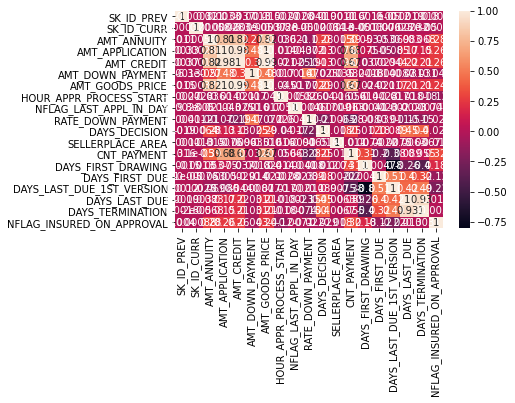

In [234]:
# 숫자형 칼럼 간 correlation 파악하기
# float, int 컬럼만 사용
corrMatrix = prev_df.select_dtypes(include=['float64', 'int64']).corr()
# sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [236]:
## # heatmat의 윗 부분만 선택
upper= corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# threshold 0.9 이상 컬럼은 삭제
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

prev_df.drop(to_drop, axis=1, inplace=True)

In [237]:
prev_df.shape

(1670214, 32)

#### correlation, null값 비율에 따라 컬럼 5개가 삭제됐다.

## 중복되는 칼럼 찾기! 

In [241]:
## 중복 칼럼
columns_list_prev = prev_df.columns.tolist()
columns_list_train = df_train.columns.tolist()

In [242]:
columns_list_prev

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'NFLAG_INSURED_ON_APPROVAL']

In [246]:
## 중복칼럼
redundant_cols = []

for col in columns_list_prev:
    if col in columns_list_train:
        redundant_cols.append(col)
        


In [247]:
redundant_cols 


['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

In [248]:
## id 칼럼 제외하고 중복 칼럼
redundant_cols = redundant_cols[1:]

## 새로운 칼럼이름 설정
new_cols_name = []

for col in redundant_cols:
    new_cols_name.append(f'{col}_prev')

new_cols_name


['NAME_CONTRACT_TYPE_prev',
 'AMT_ANNUITY_prev',
 'WEEKDAY_APPR_PROCESS_START_prev',
 'HOUR_APPR_PROCESS_START_prev',
 'NAME_TYPE_SUITE_prev']

In [250]:
## 원래 이름과 바꿀 이름 
dict_list = dict(zip(redundant_cols, new_cols_name))
print(dict_list)

{'NAME_CONTRACT_TYPE': 'NAME_CONTRACT_TYPE_prev', 'AMT_ANNUITY': 'AMT_ANNUITY_prev', 'WEEKDAY_APPR_PROCESS_START': 'WEEKDAY_APPR_PROCESS_START_prev', 'HOUR_APPR_PROCESS_START': 'HOUR_APPR_PROCESS_START_prev', 'NAME_TYPE_SUITE': 'NAME_TYPE_SUITE_prev'}


In [252]:
## prev_df 
prev_df.rename(columns=dict_list, inplace=True)
prev_df.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,NaN,SATURDAY,8,Y,1,...,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,NaN,MONDAY,7,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,NaN,MONDAY,15,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,NaN,SATURDAY,15,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN


### 데이터 합치기


In [255]:
## 데이터 합치기!
merged_df = df_age.merge(prev_df, on='SK_ID_CURR', how='inner')


(1413701, 156)

In [256]:
## 필요없는 칼럼 없애기 
merged_df.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-1,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,8025,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-1,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-1,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN


### 상관관계 높은 칼럼 삭제

In [257]:
## merged 데이터 확인
merged_df.shape
merged_df.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
                              ...   
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
NFLAG_INSURED_ON_APPROVAL    float64
Length: 156, dtype: object

In [258]:
## target 컬럼 타입 변경
merged_df.TARGET.apply(str) # 컬럼 타입 변경

0          1
1          0
2          0
3          0
4          0
          ..
1413696    0
1413697    0
1413698    0
1413699    0
1413700    0
Name: TARGET, Length: 1413701, dtype: object

In [267]:
# curr_id도 삭제
merged_df = merged_df.drop(columns=['SK_ID_CURR'], axis=1)

# prev_id 컬럼 삭제
merged_df = merged_df.drop(columns=['SK_ID_PREV'], axis=1)

In [262]:
## 상관관계 높은 칼럼 삭제
corrMatrix_merged = merged_df.select_dtypes(include=['float64','int64']).corr()



In [263]:
## heatmat의 윗 부분만 삭제
upper= corrMatrix_merged.where(np.triu(np.ones(corrMatrix_merged.shape), k=1).astype(np.bool))

# threshold 0.9 이상 컬럼은 삭제
to_drop = [column for column in upper.columns if any(upper[column] > 0.9) ]

merged_df.drop(to_drop, axis=1, inplace=True)

In [264]:
merged_df.shape

(1413701, 122)

### 34개 칼럼 삭제 

# 모델만들기

In [266]:
## 데이터 셋 나누기 

target = 'TARGET'

df_train.shape


(307511, 125)

In [268]:
## 데이터 분류, train, val 셋으로
train, val = train_test_split(df_train, test_size = 0.2, random_state=21)

train.shape, val.shape

((246008, 125), (61503, 125))

In [271]:
X_train = train.drop('TARGET', axis=1)
y_train = train['TARGET']

X_val = val.drop('TARGET', axis=1)
y_val = val['TARGET']

X_train.shape, y_train.shape, X_val.shape, y_val.shape


((246008, 124), (246008,), (61503, 124), (61503,))

## dummy classifier 모델 사용해보기

In [377]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='stratified')
cross_val_score(dummy, X_train, y_train, scoring='roc_auc', cv=3, n_jobs=-1)

array([0.50292247, 0.49967506, 0.50091794])

In [378]:
cross_val_score(dummy, X_train, y_train, scoring='f1', cv=3, n_jobs=-1)

array([0.07770527, 0.08427435, 0.07948426])

In [ ]:
기본모델의 성능이 굉장히 떨어진다. 

## 랜덤 포레스트 모델로 기본모델

In [272]:
## 랜덤 포레스트 분류모델 만들기
pipe = make_pipeline(
     OrdinalEncoder(),
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

# rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)

In [273]:
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                      'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                      'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                      'NAME_EDUCATION_TYPE',
                                      'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                      'OCCUPATION_TYPE',
                                      'WEEKDAY_APPR_PROCESS_START',
                                      'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                                      'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                                      '...
                                          'data_type': CategoricalDtype(categories=[20, 30, 40, 50, 60], ordered=True),
                                          'mapping': 20.0    1
30.0    2
40.0    3
50.0    4
60.0    5
NaN    -2
dtype: int64},
                       

In [274]:
#pipe.fit(X_train, y_train)

print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))



검증 정확도 0.9190933775588183
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56524
           1       0.64      0.00      0.00      4979

    accuracy                           0.92     61503
   macro avg       0.78      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



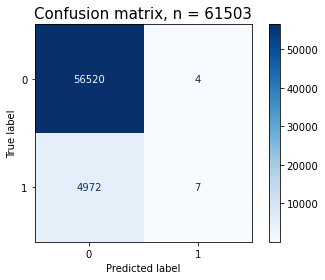

In [275]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

#### 0으로 예측한 값 중 실제 1인 값이 많으므로, 1에 대한 recall 값을 높이는 방향으로 모델을 만들어 본다. 

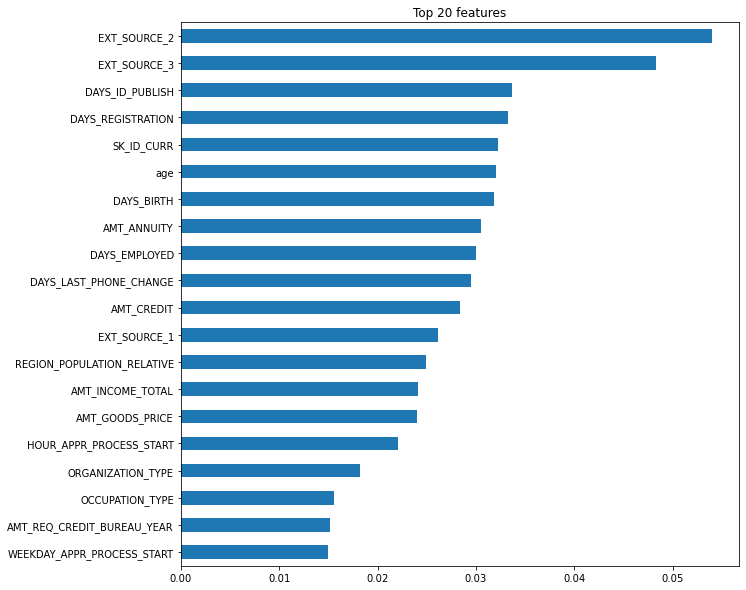

In [276]:
## 특성 중요도
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [80]:
## 외부 변수 2개 
## 고객이 대출을 신청한 동안에 신분증 문서를 변경한 일수, 신청일 기준
## 고객이 등록서류를 변경한 일 수, 신청일 기준
## 나이, 태어난 날짜!
## 매달 내야하는 돈 - 
## 직장에서 일한 일수  -
## 폰을 바꾼 마지막 날짜 
## 대출총액 - 
## 사는 지역
## 대출받아서 사려고한 상품 총액 -
## 수입 - 


##경제적 요소
매달 내야하는 돈 -
대출총액 -
대출받아서 사려고한 상품 총액 -
수입 -
직장에서 일한 일수

## 다른요소
사는 지역

## 연령에 따른 것
나이, 태어난 날짜!

## 예상 못한 것
고객이 대출을 신청한 동안에 신분증 문서를 변경한 일수, 신청일 기준
고객이 등록서류를 변경한 일 수, 신청일 기준
폰을 바꾼 마지막 날짜 

## 외부 변수


SyntaxError: invalid syntax (<ipython-input-80-fcd9a46135d5>, line 15)

In [294]:
## 따로 컬럼 골라서 모델 만들기

features_to_use = ['CODE_GENDER', 'DAYS_EMPLOYED'\
                  ,'AMT_CREDIT','AMT_ANNUITY', 'AMT_INCOME_TOTAL' , 'NAME_INCOME_TYPE', 'AMT_GOODS_PRICE'\
                  ,'NAME_HOUSING_TYPE', 'age', 'DAYS_BIRTH', 'income_rank', 'REGION_POPULATION_RELATIVE'\
                   ,'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'NAME_CONTRACT_TYPE'\
                  ,'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION'\
                  ]

In [295]:
train_c, val_c = train_test_split(train,  test_size = 0.2, random_state=21)

train_c.shape, val_c.shape

((196806, 125), (49202, 125))

In [296]:
X_train_c = train_c[features_to_use]
y_train_c = train_c['TARGET']
X_val_c = val_c[features_to_use]
y_val_c = val_c['TARGET']

In [297]:
pipe_2 = make_pipeline(
     OrdinalEncoder(),
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


In [298]:
pipe_2.fit(X_train_c, y_train_c)
print('검증 정확도', pipe_2.score(X_val_c, y_val_c))

print(classification_report(y_val_c, pipe_2.predict(X_val_c)))


검증 정확도 0.9186415186374538
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45201
           1       0.00      0.00      0.00      4001

    accuracy                           0.92     49202
   macro avg       0.46      0.50      0.48     49202
weighted avg       0.84      0.92      0.88     49202



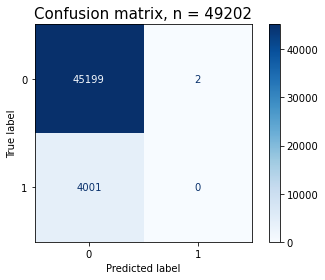

In [300]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_2, X_val_c, y_val_c,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_c)}', fontsize=15)
plt.show()

#### 0으로 예측한 값 중 실제 1인 값이 많으므로, 1에 대한 recall 값을 높이는 방향으로 모델을 만들어 본다. 

#### Q. 기본 모델을 만들었지만, 거의 대부분 0으로 예측하기 때문에, accuracy 스코어는 높지만, 모델에 의미가 없다. 
#### Q. 클래스 분균형 문제를 해결하는 방법들을 사용해보고, 다른 모델들을 돌려본다. 

## 불균형 해결법 오버 샘플링 해보기


In [360]:
df_smote = df_train

In [361]:
object_columns = df_smote.dtypes[df_smote.dtypes == 'object'].index.tolist()


In [362]:
for column in object_columns:
    df_smote[column] = pd.factorize(df_smote[column])[0]

In [363]:
df_smote.dtypes[df_smote.dtypes == 'category'].index.tolist()

['age_group', 'income_rank']

In [364]:
df_smote['age_group'].astype(int)
df_smote['income_rank'].astype(int)

0         4
1         5
2         1
3         2
4         2
         ..
307506    3
307507    1
307508    3
307509    4
307510    3
Name: income_rank, Length: 307511, dtype: int64

In [365]:
## 데이터 분류, train, val 셋으로
smote_train, smote_val = train_test_split(df_smote, test_size = 0.2, random_state=21)

train.shape, val.shape

((246008, 125), (61503, 125))

In [366]:
X_smote_train = smote_train.drop('TARGET', axis=1)
y_smote_train = smote_train['TARGET']

X_smote_val = smote_val.drop('TARGET', axis=1)
y_smote_val = smote_val['TARGET']

X_smote_train.shape, y_smote_train.shape, X_smote_val.shape, y_smote_val.shape

((246008, 124), (246008,), (61503, 124), (61503,))

In [367]:
X_smote_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 265812 to 80841
Columns: 124 entries, SK_ID_CURR to income_rank
dtypes: category(2), float64(66), int64(56)
memory usage: 231.3 MB


In [371]:
## simpleimputer를 활용한 nan 값 제거
imp_smote = SimpleImputer()
imp_X_train_smote = imp_smote.fit_transform(X_smote_train)

In [372]:
imp_X_val_smote = imp_smote.transform(X_smote_val)

In [353]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 125 entries, SK_ID_CURR to income_rank
dtypes: category(2), float64(66), int64(57)
memory usage: 289.2 MB


In [373]:
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(imp_X_train_smote, imp_X_val_smote)

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
## 이야기 

In [320]:
pipe_3 = make_pipeline(
     OrdinalEncoder(),
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


In [321]:
pipe_3.fit(X_train_over, y_train_over)
print('검증 정확도', pipe_2.score(X_val, y_val))

print(classification_report(y_val, pipe_2.predict(X_val)))

NameError: name 'X_train_over' is not defined

In [314]:
## oversampling
pipe.fit(X_train_over, y_train_over)

print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

NameError: name 'X_train_over' is not defined

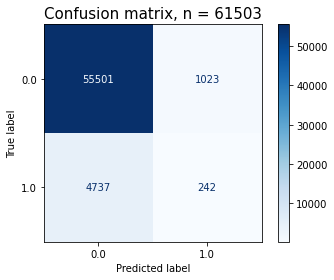

In [92]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
오히려 떨어짐 1.0은 올라갔다. 

## LGBM classifier만들기

In [381]:
## 데이터 셋 나누기 

target = 'TARGET'

df_train.shape


(307511, 125)

In [382]:
## 데이터 분류, train, val 셋으로
train, val = train_test_split(df_train, test_size = 0.2, random_state=21)

train.shape, val.shape

X_train = train.drop('TARGET', axis=1)
y_train = train['TARGET']

X_val = val.drop('TARGET', axis=1)
y_val = val['TARGET']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((246008, 124), (246008,), (61503, 124), (61503,))

In [383]:
## LGBM 분류기 만들기


clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?
    silent=-1, #?
    berbose=-1
)

clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.753509	training's binary_logloss: 0.249481	valid_1's auc: 0.744135	valid_1's binary_logloss: 0.25226
[200]	training's auc: 0.77137	training's binary_logloss: 0.242953	valid_1's auc: 0.754773	valid_1's binary_logloss: 0.248163
[300]	training's auc: 0.783482	training's binary_logloss: 0.23904	valid_1's auc: 0.759055	valid_1's binary_logloss: 0.246731
[400]	training's auc: 0.793554	training's binary_logloss: 0.235956	valid_1's auc: 0.760557	valid_1's binary_logloss: 0.246273
[500]	training's auc: 0.802523	training's binary_logloss: 0.23324	valid_1's auc: 0.761118	valid_1's binary_logloss: 0.246093
[600]	training's auc: 0.810862	training's binary_logloss: 0.230686	valid_1's auc: 0.761439	valid_1's binary_logloss: 0.245975
[700]	training's auc: 0.818434	training's binary_logloss: 0.228268	valid_1's auc: 0.761852	valid_1's binary_logloss: 0.245853
Early stopping, best iteration is:
[721]	training's auc: 0.82

LGBMClassifier(berbose=-1, learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8)

In [384]:
print('검증 정확도', clf.score(X_val, y_val))

print(classification_report(y_val, clf.predict(X_val)))

검증 정확도 0.9195323805342829
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56524
           1       0.59      0.02      0.04      4979

    accuracy                           0.92     61503
   macro avg       0.76      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



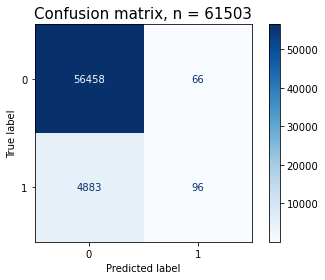

In [385]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

#### 새로운 모델에서도 상대적으로 1에 대한 precision은 올라갔지만, recall 값은 여전히 낮은 수치를 지니고 있다. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

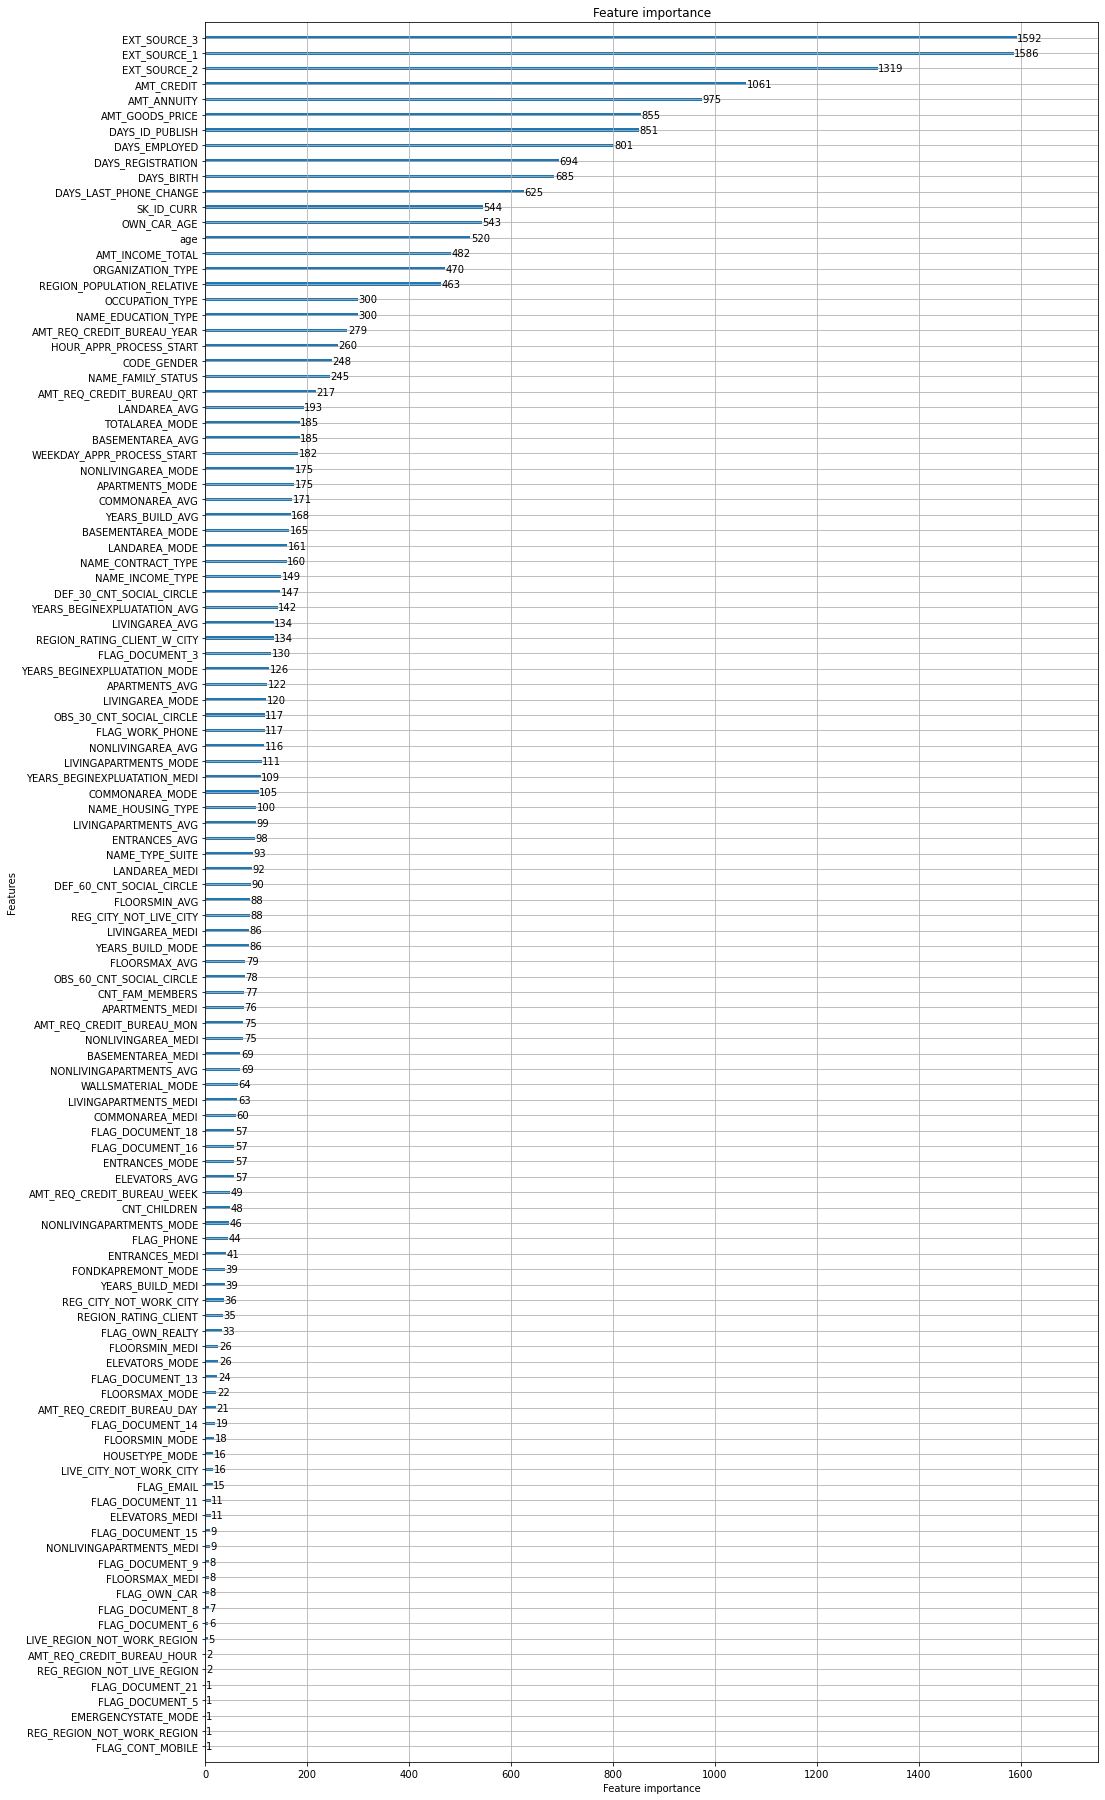

In [386]:

plot_importance(clf, figsize=(16, 32))

In [179]:
## LGBM 분류기 만들기

clf_2 = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?
    silent=-1, #?
    berbose=-1
)

clf_2.fit(X_train, y_train, eval_set = [(X_train_c, y_train_c), (X_val_c, y_val_c)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.751262	valid_0's binary_logloss: 0.249895	valid_1's auc: 0.751253	valid_1's binary_logloss: 0.251544
[200]	valid_0's auc: 0.769649	valid_0's binary_logloss: 0.243373	valid_1's auc: 0.768069	valid_1's binary_logloss: 0.245345
[300]	valid_0's auc: 0.78211	valid_0's binary_logloss: 0.239405	valid_1's auc: 0.779258	valid_1's binary_logloss: 0.241686
[400]	valid_0's auc: 0.792465	valid_0's binary_logloss: 0.236353	valid_1's auc: 0.789422	valid_1's binary_logloss: 0.238637
[500]	valid_0's auc: 0.801457	valid_0's binary_logloss: 0.233671	valid_1's auc: 0.798921	valid_1's binary_logloss: 0.235877
[600]	valid_0's auc: 0.809628	valid_0's binary_logloss: 0.231199	valid_1's auc: 0.806938	valid_1's binary_logloss: 0.233447
[700]	valid_0's auc: 0.817156	valid_0's binary_logloss: 0.22889	valid_1's auc: 0.814652	valid_1's binary_logloss: 0.231124
[800]	valid_0's auc: 0.824242	valid_0's binary_logloss: 0.226681	valid_1'

LGBMClassifier(berbose=-1, learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8)

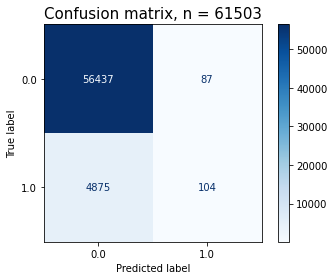

In [180]:

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf_2, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

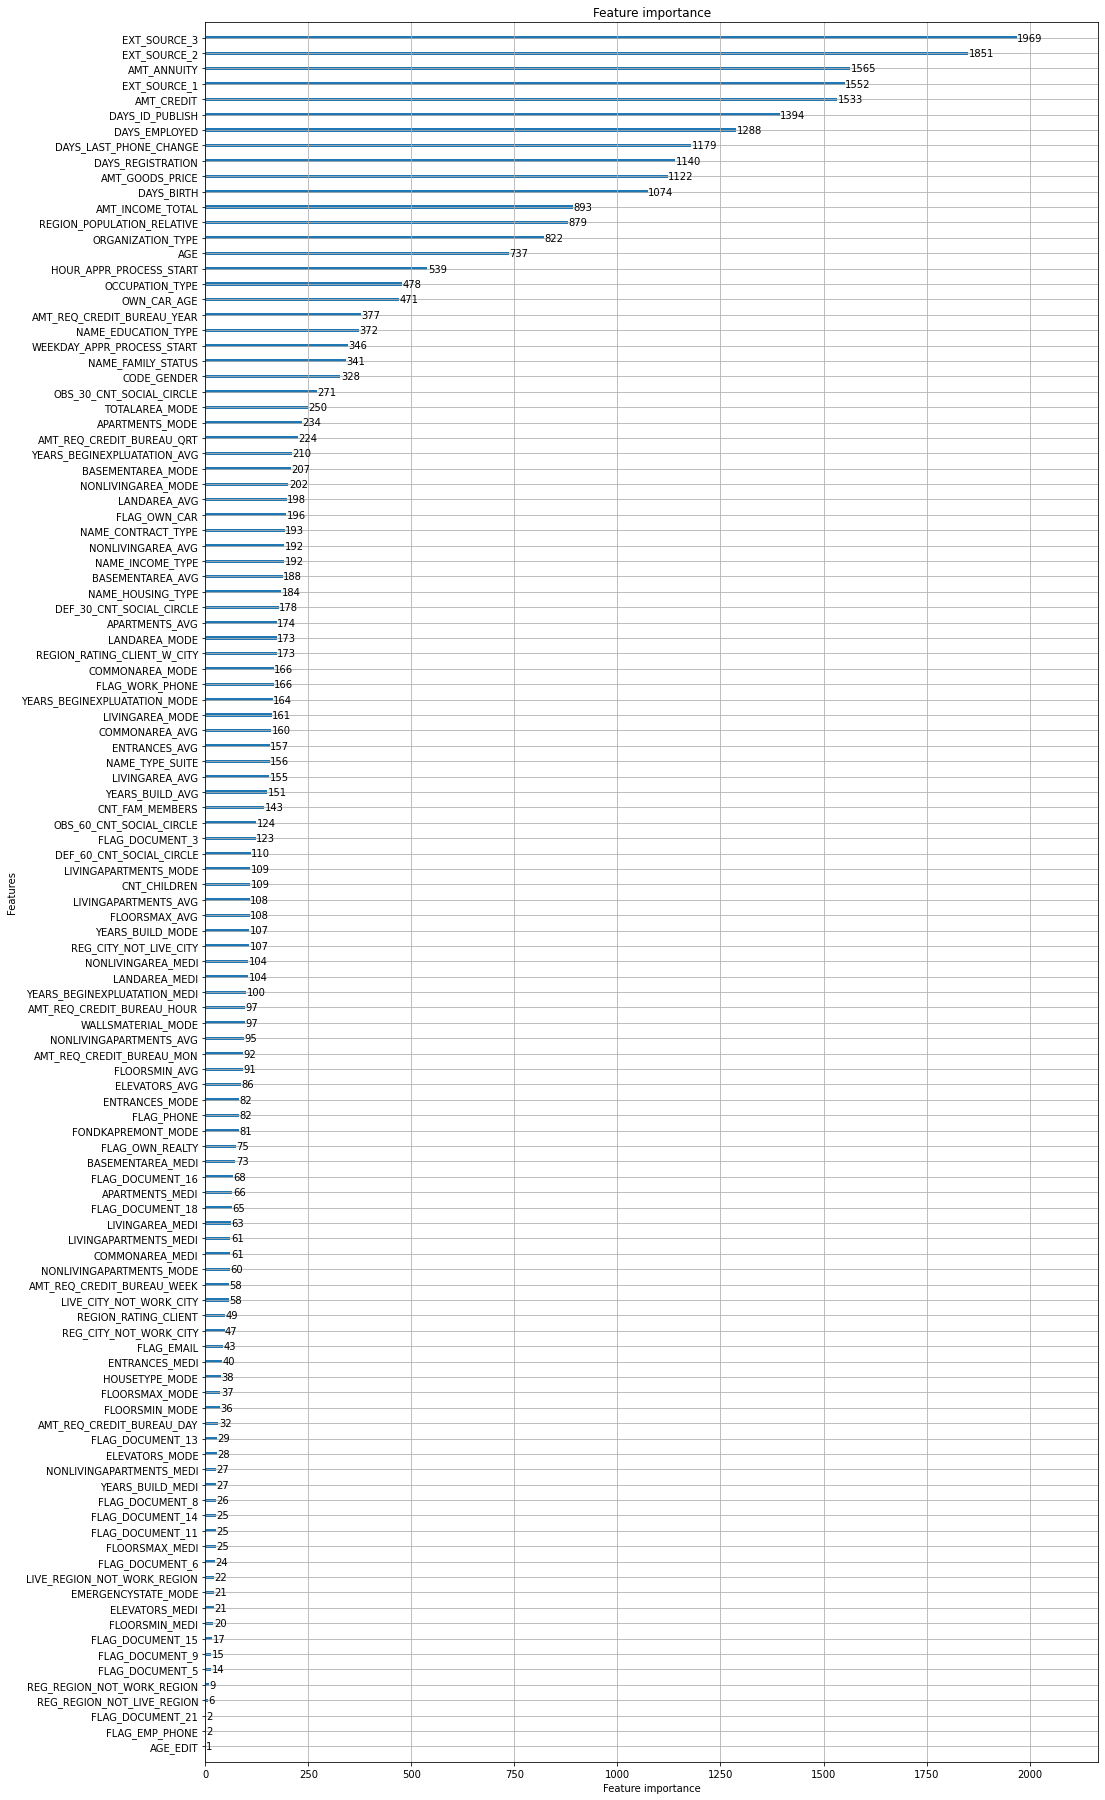

In [181]:
plot_importance(clf_2, figsize=(16, 32))

In [387]:
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')


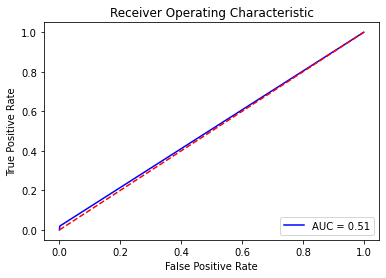

In [388]:
buildROC(y_val, clf.predict(X_val))

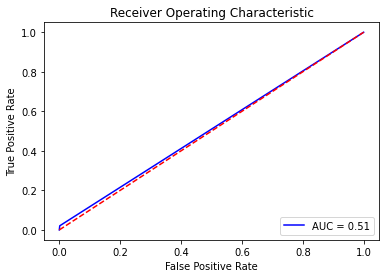

In [188]:
buildROC(y_val, clf_2.predict(X_val))

## XGBClassifier 모델 확인

In [412]:
# 모델 소요 시간을 재는 함수
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [413]:
# 타겟 0,1의 비율 저장
vc = y_train.value_counts().tolist()
ratio = float(vc[0]/vc[1])

In [414]:
ratio # 타겟 비율 확인

11.395848029829688

In [415]:
# randomized search에서 사용할 파라미터
params = {
        'min_child_weight': [1, 5, 10], # 과적합,과소적합 조정 파라미터
        'gamma': [0.5, 1, 1.5, 2, 5], # 
        'subsample': [0.6, 0.8, 1.0], # 각 트리별 관측 데이터 샘플링 비율
        'colsample_bytree': [0.6, 0.8, 1.0], # 각 트리별 feature 샘플링 비율
        'max_depth': [3, 4, 5, 7, 10] # tree의 최대 깊이
        }

### parameter 설명
### regularization within tree
- min_child_weight : 트리의 새로운 노드를 만들 때 최소 가중치, 숫자가 작을수록 자식노드가 적은 샘플에 적합해지므로 복잡한 트리를 만들게 되고 과적합되기 쉽다.
- max_depth : 루트부터 마지막 자식 노드까지 있는 총 노드의 갯수로 숫자가 커질 수록 과적합 되기 쉽다.

### regularization across trees
- gamma : regularization parameter, gamma=20인 경우 굉장히 높은 수치, 트리가 깊을 때 높은 gamma 값을 사용한다.

### sampling
- subsample : 각 단계마다 샘플을 얼마나 사용할 것인지를 정하는 것으로 1인 경우 모든 샘플을 사용한다.
- colsample_bytree : 각 단계마다 몇 개의 컬럼을 사용할 것인지 정하는 것으로 1인 경우 모든 컬럼을 사용한다.

In [417]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터
# xgboost는 imputer가 필요없다.

xgb = XGBClassifier(random_state=42,
                    learning_rate=0.2, 
                    tree_method='auto',
                    early_stopping_rounds = 50, # 50번 이상 개선이 없으면 멈춤
                    n_estimator=500,
                    scale_pos_weight=ratio) # imbalanced target을 조정하는데 사용

In [418]:
folds = 4
param_comb = 5 # 반복 수행 횟수

In [419]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc', 
                                   cv=skf.split(X_train_encoded, y_train), verbose=3, random_state=42 )


In [420]:
start_time = timer(None)
random_search.fit(X_train_encoded, y_train)
timer(start_time)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:33] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:35:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=  20.5s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:53] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:35:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=  20.3s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:13] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=  20.4s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:34] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=  24.6s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:58] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=  46.0s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:44] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:37:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=  43.7s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:28] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=  43.9s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:12] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:39:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=  39.4s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:51] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:39:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=  16.5s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:08] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:40:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=  16.5s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:24] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:40:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=  17.5s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:42] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:40:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=  18.1s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:00] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=  17.3s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:17] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=  17.5s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:35] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=  18.3s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:53] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=  19.9s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:13] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:42:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=  24.2s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:37] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:42:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=  23.7s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:01] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:43:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=  24.3s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:25] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:43:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=  28.3s


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:54] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:43:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 8 minutes and 46.96 seconds.


In [421]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([21.2153011 , 43.02487016, 16.98119211, 18.09850973, 24.93320644]), 'std_fit_time': array([1.78329361, 2.38865686, 0.67704564, 1.00735571, 1.83473679]), 'mean_score_time': array([0.24223292, 0.22798473, 0.15115559, 0.17684537, 0.20116258]), 'std_score_time': array([0.0591447 , 0.03660213, 0.00794208, 0.00720955, 0.01709847]), 'param_subsample': masked_array(data=[0.6, 0.6, 0.6, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 1, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 7, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 5, 1, 1.5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
     

### best parameter로 모델 사용


In [422]:
model = random_search.best_estimator_ # best parameter 저장

In [423]:
pred = model.predict(X_val_encoded)

In [424]:
print('검증 정확도', model.score(X_val_encoded, y_val))

print(classification_report(y_val, model.predict(X_val_encoded)))

검증 정확도 0.7017543859649122
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56524
           1       0.17      0.68      0.27      4979

    accuracy                           0.70     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.70      0.77     61503



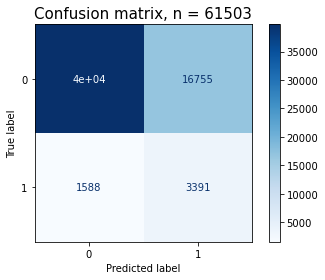

In [425]:
# confusion matrix 플롯
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_val_encoded, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [426]:
# ROC 커브 생성
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

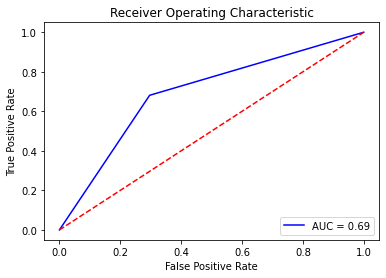

In [427]:
buildROC(y_val, model.predict(X_val_encoded))

### 모델의 성능이 꽤 많이 향상됨을 확인할 수 있다. 특히 1에 대해 recall 값이 향상한 것을 볼 수 있다. 

#### 특성중요도로 보고, 정리해서 다시 모델 개선하기!

# grouping

In [210]:
age_group_2030 = df_fin[df_fin['AGE_EDIT'] == 20 | 30]

In [211]:
income_rank_12 = df_fin[df_fin['income_rank'] == 1 | 2]

In [214]:
## randomizedsearchCV

dists = {
    'n_estimators': [200,500,1000,2000],
    'learning_rate' : [0.1, 0.05, 0.01],
    'num_leaves': [4,8,16,32],
    'subsample':[0.8,0.9,1.0], #?
    'max_depth' : [6,7,8,9,10,11,12], #?
    'colsample_bytree' : [0.8, 0.9,1.0],
    
}

model = RandomizedSearchCV(
    clf_2, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [215]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(berbose=-1, learning_rate=0.02,
                                            max_depth=12, n_estimators=1000,
                                            num_leaves=32, silent=-1,
                                            subsample=0.8),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'num_leaves': [4, 8, 16, 32],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=1)

In [216]:
## 데이터 만들기! 

print('검증 정확도', model.score(X_val, y_val))

print(classification_report(y_val, clf.predict(X_val)))

검증 정확도 0.7606101844575467
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56524
         1.0       0.57      0.02      0.03      4979

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



In [35]:
## 대출액
age_group_2030['AMT_CREDIT'].describe().apply("{0:.5f}".format)

count      13837.00000
mean      387043.16514
std       266626.20556
min        45000.00000
25%       199080.00000
50%       288873.00000
75%       523152.00000
max      2517300.00000
Name: AMT_CREDIT, dtype: object

In [36]:
## 월납입액 ??? 한달의 천만원? 1800만원?? 가능?
age_group_2030['AMT_ANNUITY'].describe().apply("{0:.5f}".format)

count    13836.00000
mean     18736.74686
std       9097.93963
min       2187.00000
25%      11608.87500
50%      17086.50000
75%      24475.50000
max      75757.50000
Name: AMT_ANNUITY, dtype: object

In [37]:
age_group_2030['TARGET'].value_counts(normalize=True)

0    0.89174
1    0.10826
Name: TARGET, dtype: float64

In [38]:
age_group_2030.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13837 entries, 12 to 307501
Columns: 125 entries, SK_ID_CURR to income_rank
dtypes: float64(67), int64(58)
memory usage: 13.3 MB


In [39]:
## 평균 수입 : 79973
## 평균 대출액 : 387043
## 월 납입액 : 18736
## 상환비율 : 
## 0  :  0.89174
## 1  :  0.10826



In [43]:
## 데이터 분류, 타켓과 train 셋
X_train = df.drop(['TARGET', 'SK_ID_CURR'], axis=1) 
y_train = df['TARGET']

X_train.shape, y_train.shape

((307511, 123), (307511,))

In [ ]:
## df에서 2030 데이터만 빼기

In [44]:
## 2030 데이터 셋 나누기
age_group_2030_X_val = age_group_2030.drop(['TARGET', 'SK_ID_CURR'], axis=1) 
age_group_2030_y_val = age_group_2030['TARGET']

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, NAME_CONTRACT_TYPE to income_rank
dtypes: float64(67), int64(56)
memory usage: 288.6 MB


In [46]:
age_group_2030_X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13837 entries, 12 to 307501
Columns: 123 entries, NAME_CONTRACT_TYPE to income_rank
dtypes: float64(67), int64(56)
memory usage: 13.1 MB


In [47]:
X_train.shape, age_group_2030_X_val.shape

((307511, 123), (13837, 123))

In [48]:
## LGBM 분류기 만들기

clf_3 = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?₩
    silent=-1, #?
    berbose=-1
)

clf_3.fit(X_train, y_train, eval_set = [(X_train, y_train), (age_group_2030_X_val, age_group_2030_y_val)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.752123	training's binary_logloss: 0.249957	valid_1's auc: 0.750934	valid_1's binary_logloss: 0.305394
[200]	training's auc: 0.76869	training's binary_logloss: 0.243883	valid_1's auc: 0.765058	valid_1's binary_logloss: 0.297927
[300]	training's auc: 0.779336	training's binary_logloss: 0.240387	valid_1's auc: 0.772867	valid_1's binary_logloss: 0.294204
[400]	training's auc: 0.788515	training's binary_logloss: 0.237679	valid_1's auc: 0.779229	valid_1's binary_logloss: 0.291645
[500]	training's auc: 0.796186	training's binary_logloss: 0.235378	valid_1's auc: 0.784953	valid_1's binary_logloss: 0.289449
[600]	training's auc: 0.803395	training's binary_logloss: 0.233257	valid_1's auc: 0.789668	valid_1's binary_logloss: 0.287652
[700]	training's auc: 0.809834	training's binary_logloss: 0.231273	valid_1's auc: 0.794636	valid_1's binary_logloss: 0.285814
[800]	training's auc: 0.816292	training's binary_logloss: 

LGBMClassifier(berbose=-1, learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

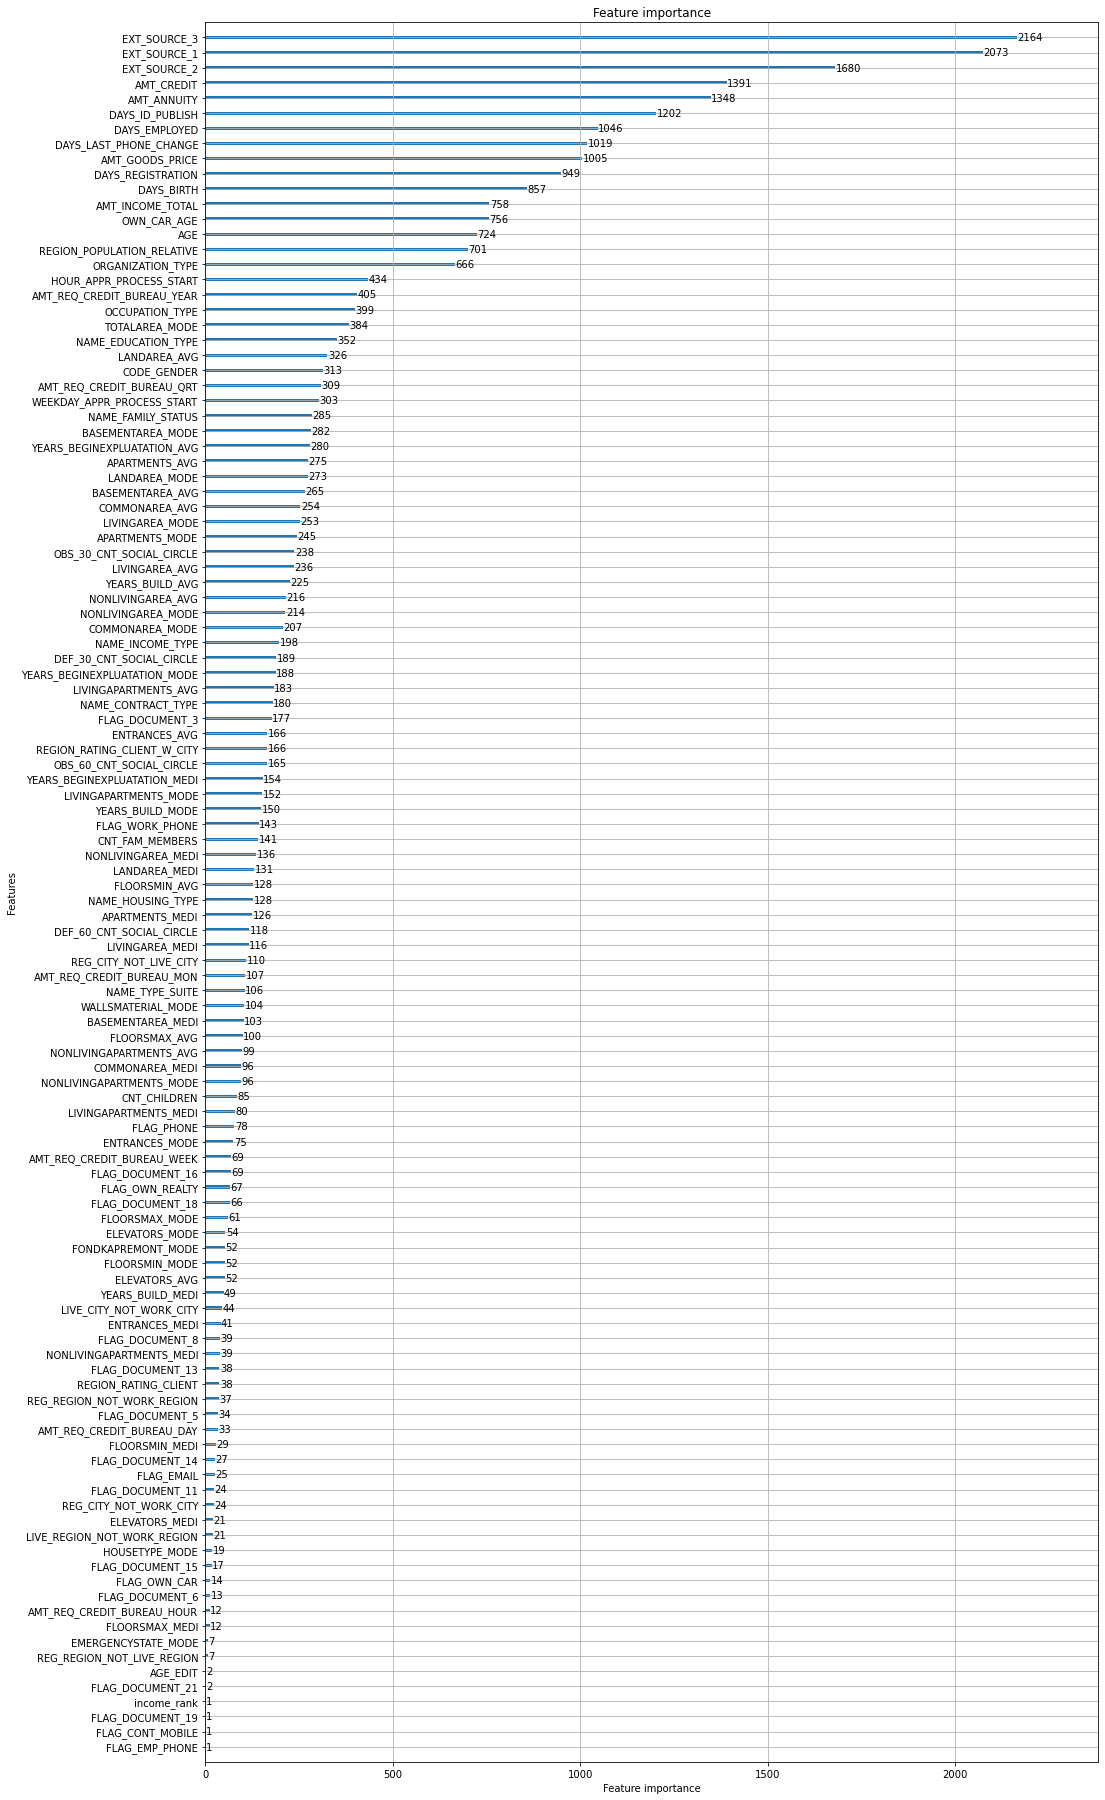

In [49]:

plot_importance(clf_3, figsize=(16, 32))

In [52]:

print('검증 정확도', clf_3.score(age_group_2030_X_val, age_group_2030_y_val))

print(classification_report(age_group_2030_y_val, clf_3.predict(age_group_2030_X_val)))

검증 정확도 0.8941244489412445
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12339
           1       0.75      0.03      0.06      1498

    accuracy                           0.89     13837
   macro avg       0.82      0.52      0.50     13837
weighted avg       0.88      0.89      0.85     13837



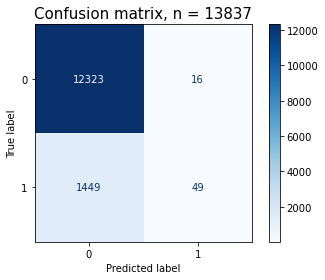

In [53]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf_3, age_group_2030_X_val, age_group_2030_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(age_group_2030_y_val)}', fontsize=15)
plt.show()



In [54]:

def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')


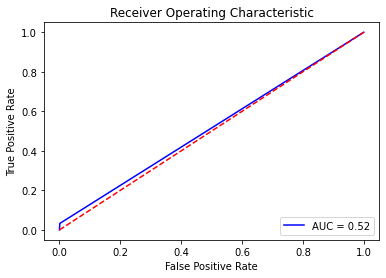

In [55]:
buildROC(age_group_2030_y_val, clf_3.predict(age_group_2030_X_val))

In [75]:
row = age_group_2030_X_val.iloc[[3000]]
row

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_EDIT,income_rank
67341,0,1,0,0,3,94500.0,454500.0,14661.0,454500.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,34.90411,30.0,1


In [81]:
## shap을 활용한 모델 해석

# explainer = shap.TreeExplainer(model)
# row_processed = processor.transform(row)
# shap_values = explainer.shap_values(row_processed)

# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values, 
#     features=row, 
#     link='logit' # SHAP value를 확률로 변환해 표시합니다.
# )

#%time shap_values = shap.TreeExplainer(clf_3).shap_values(row)

explainer =shap.TreeExplainer(clf_3)
shape_value = explainer.shap_values(age_group_2030_X_val)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values[1,:], 
    features=row[1,:], 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.

)


TypeError: list indices must be integers or slices, not tuple

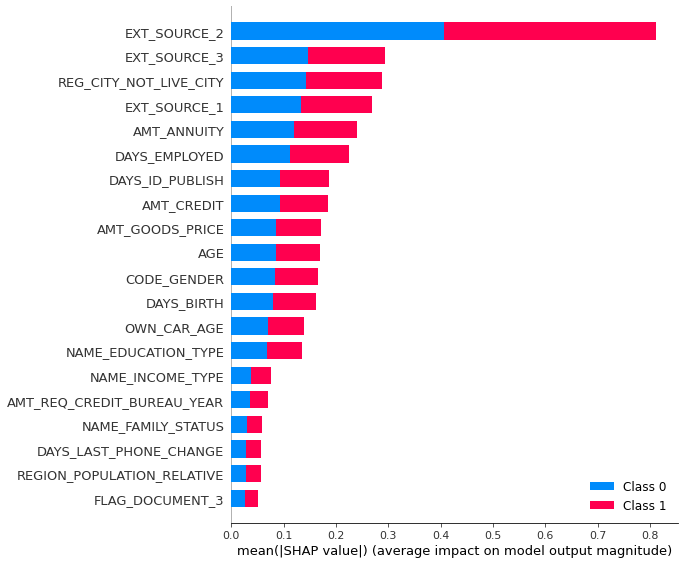

In [82]:
shap.summary_plot(shap_values, row)


In [379]:
# ## 연속형 숫자가 feature일 때 TARGET값이 0과 1일 때 시각화
# ## feature에 따른 TARGET값 별 분포도 비교 시각화
# def show_hist_by_targe(df, columns):
#     cond_1 = (df['TARGET']==1)
#     cond_0 = (df['TARGET']==0)
    
#     for column in columns:
        

# previous 데이터 가지고 모델 생성해서 진행해보기


In [430]:
## 아웃라이어를 제거하는 함수 만들기!
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df[col] = df[col][~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
  return df[col]

In [428]:
merged_df.shape

(1413701, 120)

In [458]:
df_train.info(), df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 125 entries, SK_ID_CURR to income_rank
dtypes: category(2), float64(66), int64(57)
memory usage: 289.2 MB


(None, (307511, 125))

In [459]:
merged_df.info(), merged_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 120 entries, TARGET to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(43), int64(43), object(32)
memory usage: 1.3+ GB


(None, (1413701, 120))

In [460]:
prev_df.shape

(1670214, 32)

In [449]:
merged_df['TARGET'].value_counts(normalize=True)

0    0.913447
1    0.086553
Name: TARGET, dtype: float64

In [431]:
m_train, m_val = train_test_split(merged_df, train_size=0.80, test_size=0.20, 
                              stratify=merged_df[target], random_state=42)

In [432]:
m_X_train = m_train.drop('TARGET', axis=1)
m_y_train = m_train['TARGET']

m_X_val = m_val.drop('TARGET', axis=1)
m_y_val = m_val['TARGET']

m_X_train.shape, m_y_train.shape, m_X_val.shape, m_y_val.shape

((1130960, 119), (1130960,), (282741, 119), (282741,))

## 랜덤 포레스트 모델

In [434]:
## 랜덤포레스트 활용해보기
pipe = make_pipeline(
     OrdinalEncoder(),
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

In [435]:
pipe.fit(m_X_train, m_y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                      'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                      'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                      'NAME_EDUCATION_TYPE',
                                      'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                      'OCCUPATION_TYPE',
                                      'WEEKDAY_APPR_PROCESS_START',
                                      'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                                      'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                                      '...
Insurance                   26
Animals                     27
NaN                         -2
dtype: int64},
                                         {'col': 'NAME_PORTFOLIO',
                                          'data_type': dtype('O'),
                             

In [440]:
#pipe.fit(X_train, y_train)

print('검증 정확도', pipe.score(m_X_val, m_y_val))

print(classification_report(m_y_val, pipe.predict(m_X_val)))



검증 정확도 0.9676877424922455
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    258269
           1       1.00      0.63      0.77     24472

    accuracy                           0.97    282741
   macro avg       0.98      0.81      0.88    282741
weighted avg       0.97      0.97      0.96    282741



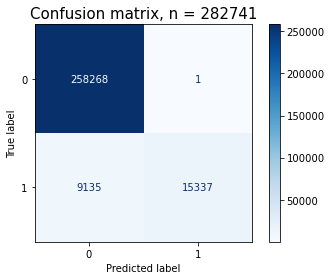

In [441]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, m_X_val, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

In [442]:
from sklearn import metrics

def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')


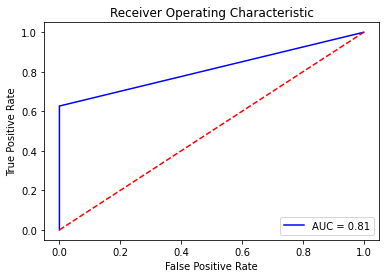

In [445]:
buildROC(m_y_val, pipe.predict(m_X_val))

In [ ]:
## 랜덤포레스트 

## 랜덤포레스트 기본으로 해도, AUC 커브가 엄청나게 올라감.

In [453]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 120 entries, TARGET to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(43), int64(43), object(32)
memory usage: 1.3+ GB


In [463]:
merged_object_columns = merged_df.dtypes[merged_df.dtypes == object].index.tolist()
merged_object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE_prev',
 'WEEKDAY_APPR_PROCESS_START_prev',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_prev',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [464]:
## for문으로 object 모두 변환
for column in merged_object_columns:
    merged_df[column] = pd.factorize(merged_df[column])[0]

In [466]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 120 entries, TARGET to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(43), int64(75)
memory usage: 1.3 GB


In [467]:
m_train, m_val = train_test_split(merged_df, train_size=0.80, test_size=0.20, 
                              stratify=merged_df[target], random_state=42)

In [468]:
m_X_train = m_train.drop('TARGET', axis=1)
m_y_train = m_train['TARGET']

m_X_val = m_val.drop('TARGET', axis=1)
m_y_val = m_val['TARGET']

m_X_train.shape, m_y_train.shape, m_X_val.shape, m_y_val.shape

((1130960, 119), (1130960,), (282741, 119), (282741,))

In [469]:
## LGBM 분류기 만들기

m_clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?
    silent=-1, #?
    berbose=-1
)

m_clf.fit(m_X_train, m_y_train, eval_set = [(m_X_train, m_y_train), (m_X_val, m_y_val)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.753875	training's binary_logloss: 0.261358	valid_1's auc: 0.748779	valid_1's binary_logloss: 0.262569
[200]	training's auc: 0.775764	training's binary_logloss: 0.253409	valid_1's auc: 0.768785	valid_1's binary_logloss: 0.255323
[300]	training's auc: 0.791382	training's binary_logloss: 0.247941	valid_1's auc: 0.782821	valid_1's binary_logloss: 0.250448
[400]	training's auc: 0.804179	training's binary_logloss: 0.243491	valid_1's auc: 0.794212	valid_1's binary_logloss: 0.246552
[500]	training's auc: 0.815008	training's binary_logloss: 0.23968	valid_1's auc: 0.803315	valid_1's binary_logloss: 0.243368
[600]	training's auc: 0.825466	training's binary_logloss: 0.236022	valid_1's auc: 0.812075	valid_1's binary_logloss: 0.24031
[700]	training's auc: 0.833966	training's binary_logloss: 0.232762	valid_1's auc: 0.81954	valid_1's binary_logloss: 0.237492
[800]	training's auc: 0.841062	training's binary_logloss: 0.

LGBMClassifier(berbose=-1, learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8)

In [470]:
print('검증 정확도', m_clf.score(m_X_val, m_y_val))

print(classification_report(m_y_val, m_clf.predict(m_X_val)))

검증 정확도 0.917493395015226
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    258269
           1       0.84      0.06      0.11     24472

    accuracy                           0.92    282741
   macro avg       0.88      0.53      0.53    282741
weighted avg       0.91      0.92      0.88    282741



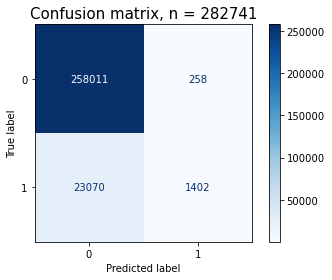

In [471]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(m_clf, m_X_val, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

In [472]:
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

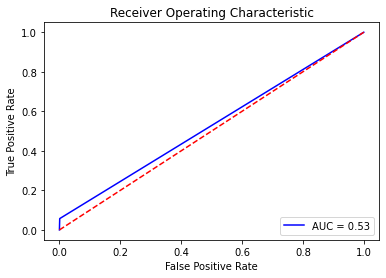

In [474]:
buildROC(m_y_val, m_clf.predict(m_X_val))

In [ ]:
###  오히려 성능 향상에 크게 차이가 없음.

## XGBClassifier


In [475]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [477]:
vc = m_y_train.value_counts().tolist()
ratio = float(vc[0]/vc[1])

In [478]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 10]
        }

In [480]:
imputer = SimpleImputer(strategy='most_frequent')
m_X_imputed = imputer.fit_transform(m_X_train)
m_X_val_imputed = imputer.transform(m_X_val)

In [482]:

encoder = OneHotEncoder(handle_unknown = 'ignore')
m_X_encoded = encoder.fit_transform(m_X_imputed) # 학습데이터
m_X_val_encoded = encoder.transform(m_X_val_imputed) # 검증데이터

In [483]:
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.2, 
                    tree_method='auto',
                    early_stopping_rounds = 50,
                    n_estimator=500,
                    scale_pos_weight=ratio) # imbalanced이므로 사용

In [484]:
folds = 4
param_comb = 5

In [486]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc', 
                                   cv=skf.split(m_X_encoded, m_y_train), verbose=3, random_state=42 )

In [487]:
start_time = timer(None)
random_search.fit(m_X_encoded, m_y_train)
timer(start_time)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:33] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:22:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time= 8.8min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:35] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:31:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time= 6.3min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:41] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:37:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time= 4.3min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:03] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:42:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time= 4.7min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:42] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time= 6.7min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:30] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:53:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time= 6.8min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:18] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:00:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time= 6.5min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:51] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time= 7.0min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:13:48] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:13:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time= 4.8min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:36] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:18:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time= 4.5min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:23:21] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:23:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time= 4.4min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:25] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:27:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time= 4.9min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:20] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:32:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time= 4.4min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:36:47] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time= 4.7min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:41:24] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:41:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time= 4.0min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:26] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time= 4.1min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:29] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time= 4.7min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:34] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:54:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time= 9.7min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:19] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:04:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time= 7.8min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:07] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/4] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time= 6.9min


/Users/ohsekwang/opt/anaconda3/envs/nytaxi/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:14] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 2 hours 9 minutes and 21.24 seconds.


In [488]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([350.89463943, 393.86660397, 267.39811128, 248.24692339,
       421.39659947]), 'std_fit_time': array([105.98532839,  12.03221883,  12.02795843,  15.36699898,
       107.80813736]), 'mean_score_time': array([11.2392115 , 12.33488119, 10.09593982,  9.85806686, 15.70069021]), 'std_score_time': array([1.11574903, 2.96996226, 0.23900541, 0.06713857, 5.3306855 ]), 'param_subsample': masked_array(data=[0.6, 0.6, 0.6, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 1, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 7, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 5, 1, 1.5, 1],
             mask=[False, False, False, False, Fa

In [489]:
model = random_search.best_estimator_

In [490]:
pred = model.predict(m_X_val_encoded)

In [491]:
print('검증 정확도', model.score(m_X_val_encoded, m_y_val))

print(classification_report(m_y_val, model.predict(m_X_val_encoded)))

검증 정확도 0.7133348187917564
              precision    recall  f1-score   support

           0       0.96      0.72      0.82    258269
           1       0.19      0.69      0.29     24472

    accuracy                           0.71    282741
   macro avg       0.57      0.70      0.56    282741
weighted avg       0.89      0.71      0.77    282741



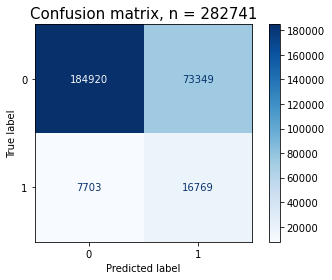

In [492]:
# confusion matrix 플롯
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, m_X_val_encoded, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

In [493]:

def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

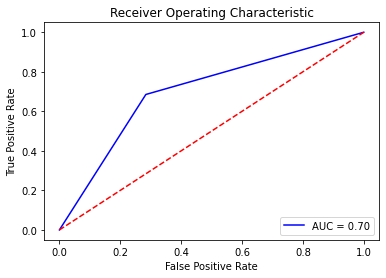

In [494]:
buildROC(m_y_val, model.predict(m_X_val_encoded))